In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt ### Библиотека для рисования графичков, гистограмм, и проч.

### нужно писать магию чтобы графики рисовались внутри jupyter notebook 
%matplotlib inline              

##### Игрушечный пример

In [13]:
import numpy as np
import random
np.random.seed(13)
random.randint(1,100)

52

In [8]:
df = pd.DataFrame(
    data=np.array([
        ['f', 55, 171],
        ['f', 54, 180],
        ['f', 60, 173],
        ['f', 59, 180],
        ['m', 60, 177],
        ['m', 65, 177],
        ['m', 75, 165],
        ['m', 83, 182],
        ['m', 72, 165],
        ['m', 85, 183],
        ['f', 49, 172],
        ['f', 55, 155],
       ]).T, 
    index=['sex', 'weight', 'height']).T

In [3]:
df

,sex,weight,height
0,f,55,171
1,f,54,180
2,f,60,173
3,f,59,180
4,m,60,177
5,m,65,177
6,m,75,165
7,m,83,182
8,m,72,165
9,m,85,183


In [4]:
df.weight = df.weight.astype(np.int32)
df.height = df.height.astype(np.int32)

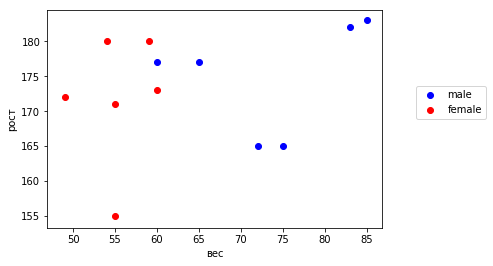

In [5]:
plt.scatter(df.weight[df.sex=='m'], df.height[df.sex=='m'], color = 'blue', label='male');
plt.scatter(df.weight[df.sex=='f'], df.height[df.sex=='f'], color = 'red', label='female');
plt.legend(loc=[1.1, 0.5]);
plt.ylabel('рост');
plt.xlabel('вес');

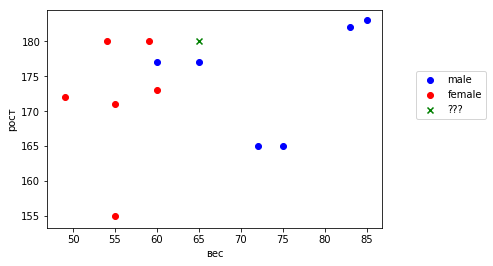

In [6]:
plt.scatter(df.weight[df.sex=='m'], df.height[df.sex=='m'], color = 'blue', label='male');
plt.scatter(df.weight[df.sex=='f'], df.height[df.sex=='f'], color = 'red', label='female');

plt.scatter(65, 180, color = 'green', marker='x', label='???');
plt.legend(loc=[1.1, 0.5]);
plt.ylabel('рост');
plt.xlabel('вес');

________

## Попредсказываем?

##### пандас умеет в интернет

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rmcelreath/rethinking/master/data/Howell1.csv', sep=';')
df = df[np.logical_and(df.age > 18, df.age < 50)] 

In [ ]:
df.shape

In [ ]:
df_train = df.loc[:100]
df_test = df.loc[150:180]

In [ ]:
df_train.head()

In [ ]:
def plot(df):
    plt.scatter(df.weight[df.male==1], df.height[df.male==1], color = 'blue', label='male');
    plt.scatter(df.weight[df.male==0], df.height[df.male==0], color = 'red', label='female');
    plt.legend(loc=[1.1, 0.5]);
    plt.ylabel('рост');
    plt.xlabel('вес');

In [ ]:
plot(df_train)

In [ ]:
plot(df_test)

In [ ]:
plt.scatter(df_test.weight[df_test.male==1], df_test.height[df_test.male==1], color = 'blue', label='male');
plt.scatter(df_test.weight[df_test.male==0], df_test.height[df_test.male==0], color = 'red', label='female');

plt.scatter(55, 163, color = 'black', marker='x', label='female');
c1 = plt.Circle((55, 163), 3, color='r', fill=False)
plt.gcf().gca().add_artist(c1)

plt.legend(loc=[1.1, 0.5]);
plt.ylabel('рост');
plt.xlabel('вес');

> Заметили почему наша окружность нарисовалась в виде эллипса?

##### Напишем свой классификатор который считает N-ближайших соседей - делает предсказание на основании большинства его соседей.

In [ ]:
np.argsort( np.array([5,2,2,0,0]) ) # возвращает индексы элементов так 
                                    # как если бы элементы были отсортированы в порядке неубывания

In [ ]:
np.bincount( np.array([5,2,2,0,0]) ) # возвращает число вхождений каждого значения
                                     # длина массива - на один больше макс. значения

In [ ]:
np.argmax( [1, 2, 200, 5, 2] )       # вернет позицию на которой стоит максимальный элемент

In [ ]:
X_train = df_train[['height', 'weight']].values
y_train = df_train['male'].values

X_test = df_test[['height', 'weight']].values

In [ ]:
X_train

In [ ]:
y_train

_________

In [ ]:
# стандартизуем

mean_ = X_train.mean(axis=0)
std_ = X_train.std(axis=0)

X_train = (X_train - mean_) / std_
X_test = (X_test - mean_) / std_

In [ ]:
X_test

________

In [ ]:
class KNN:
    """
    simple KNN classifier
    """
    
    def __init__(self, n):
        self.n = n
        
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        y = []
        assert len(X.shape) == 2
        for (h, w) in X:
            ### Посчитаем расстояние от всех элементов в тренировочной выборке
            # до текущего примера -> результат - вектор размерности трейна
            d = np.sqrt((h - self.X[:, 0]) ** 2 + (w - self.X[:, 1]) ** 2)
            ### Возьмем индексы n элементов, расстояние до которых минимально
            ### результат -> вектор из n элементов
            idx = np.argsort(d)[:self.n]
            ### Посчитаем частоту меток для каждого случая 
            ### результат -> вектор длинны 2 который покажет
            ### сколько соседей 0-го класса, сколько соседей 1-го класса.
            counts = np.bincount(self.y[idx])
            ### возьмем самый часто встречаемый в соседях класс.
            prediction = np.argmax(counts)
            y.append(prediction)
        return y

In [ ]:
knn = KNN(8)

_______

In [ ]:
y_train[np.array([1, 2])]

In [ ]:
knn.fit(X_train, y_train)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
'acc = %f' % np.mean(y_pred == df_test['male'].values)

##### Круто. а где мы ошиблись ?

In [ ]:
df_test[y_pred != df_test['male'].values]

> мальчик ростом 154 см с весом ~50 кг. - кажется сложный кейс.

__________